In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

/tmp/ipykernel_26336/250287064.py:76: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cumulative_df[f'{service}_cumulative'] = df[columns].fillna(0).sum(axis=1)
/tmp/ipykernel_26336/250287064.py:76: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cumulative_df[f'{service}_cumulative'] = df[columns].fillna(0).sum(axis=1)
/tmp/ipykernel_26336/250287064.py:76: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

OUTLIER DETECTION AND CLEANING - TCP CPU STRESS ANALYSIS
  🔍 CPUSTRESS:
    ✅ Cleaned 252 outliers across all TCP metrics
  🔍 BASELINE:
    ✅ Cleaned 285 outliers across all TCP metrics
  🔍 CPUSTRESS:
    ✅ No outliers detected
  🔍 BASELINE:
    ✅ No outliers detected
  🔍 CPUSTRESS:
    ✅ Cleaned 7 outliers across all TCP metrics
  🔍 BASELINE:
    ✅ Cleaned 10 outliers across all TCP metrics
  🔍 CPUSTRESS:
    ✅ Cleaned 3 outliers across all TCP metrics
  🔍 BASELINE:
    ✅ Cleaned 6 outliers across all TCP metrics
  🔍 CPUSTRESS:
    ✅ Cleaned 4 outliers across all TCP metrics
  🔍 BASELINE:
    ✅ No outliers detected

COMPREHENSIVE TCP CPU STRESS ANALYSIS

🔄 Analyzing SRTT Cumulative...


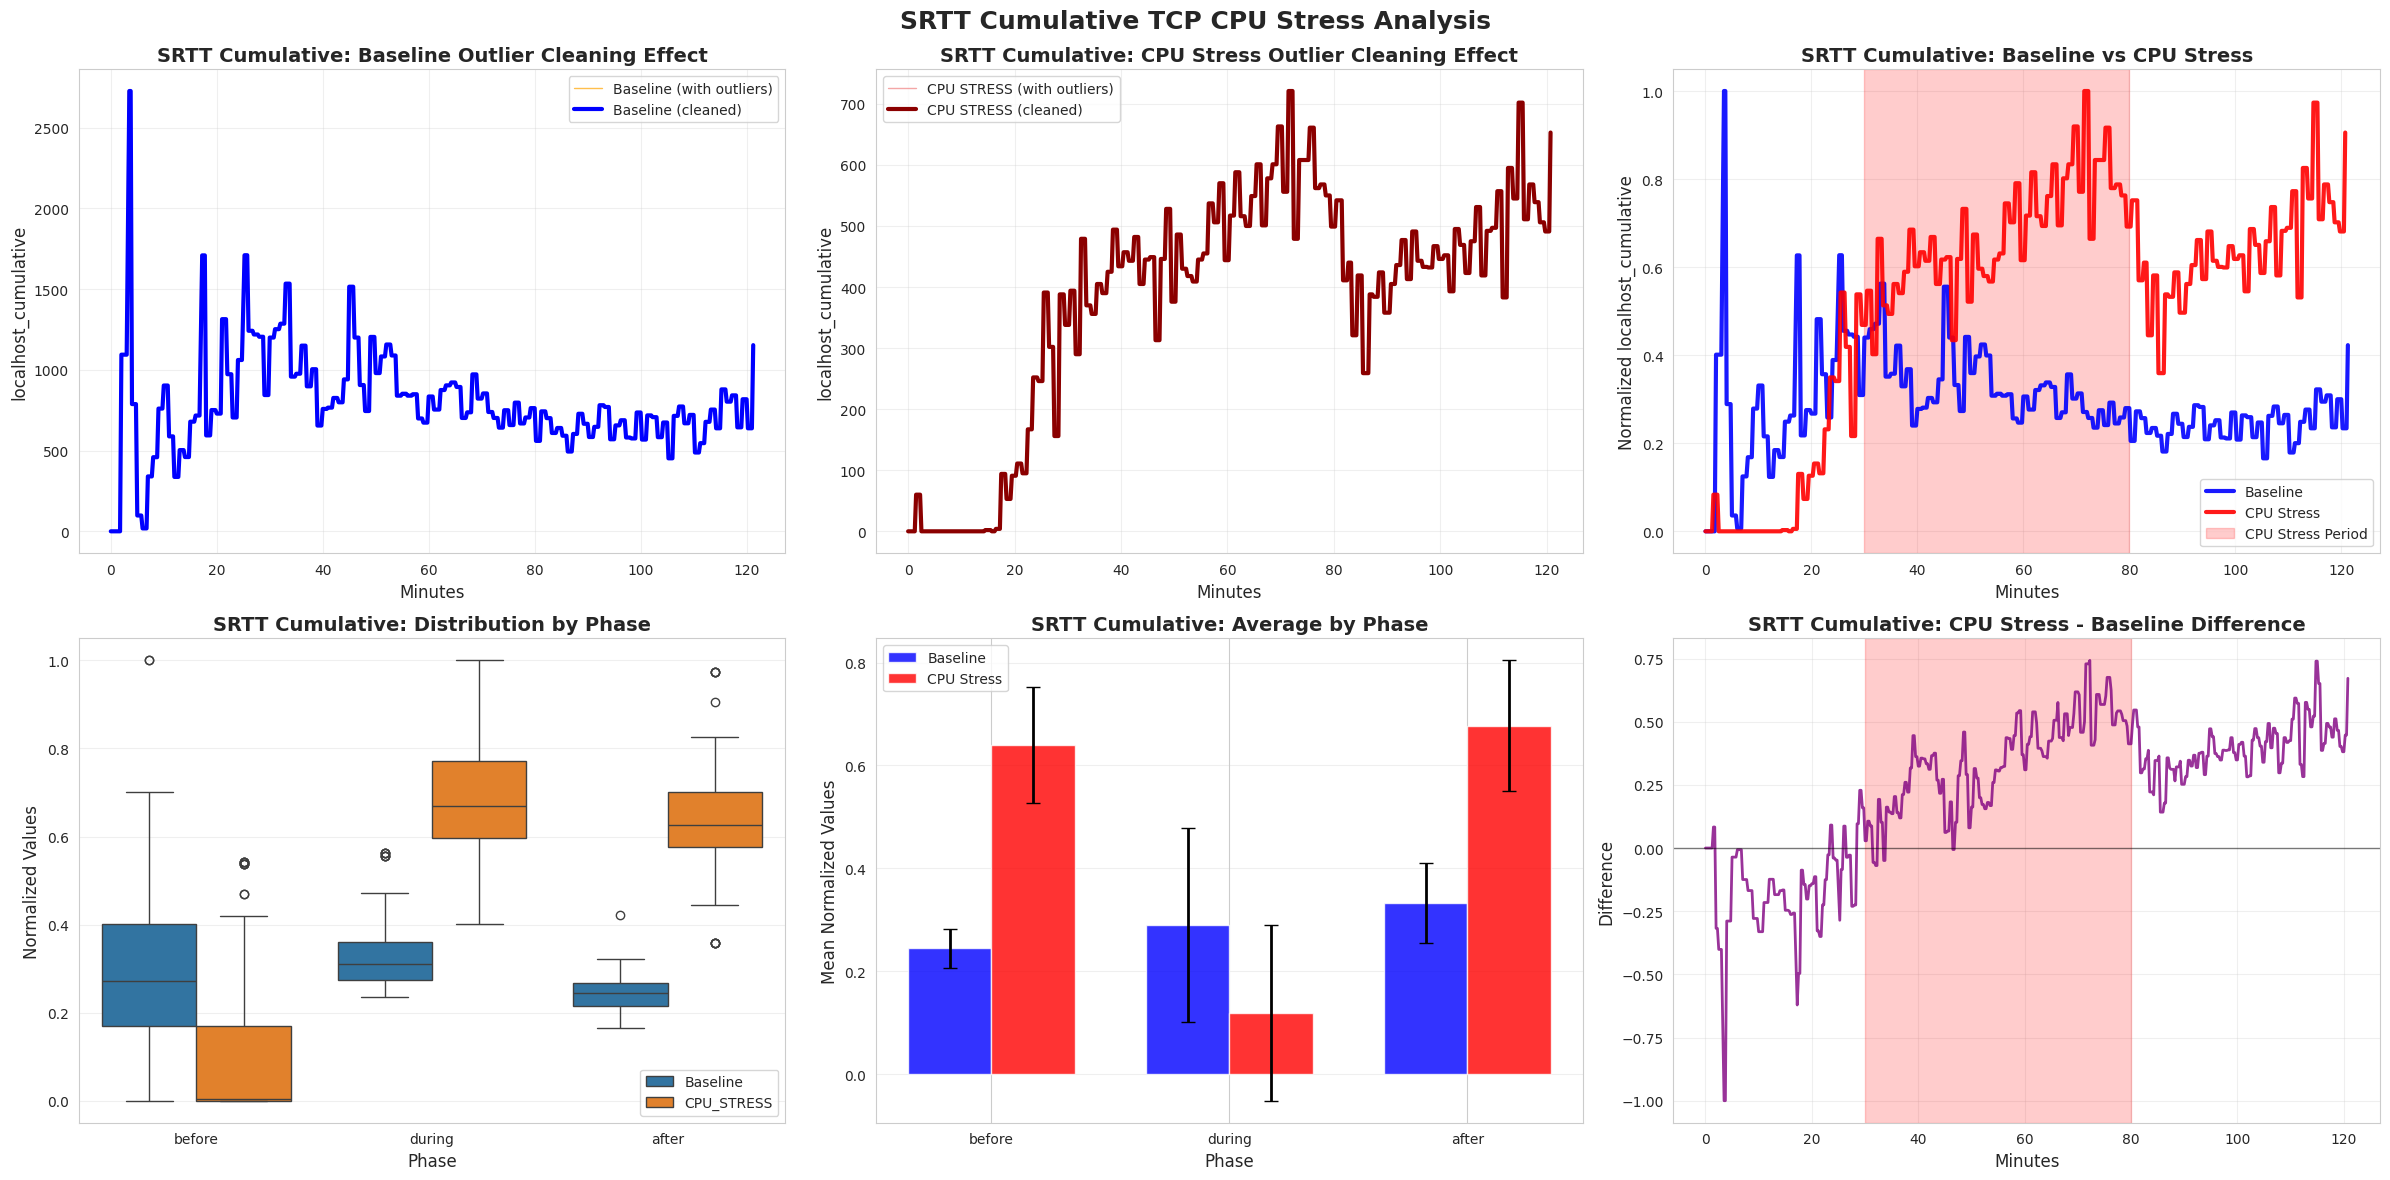


SRTT CUMULATIVE - TCP CPU STRESS ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.2446  0.0381  0.1657  0.4228
before  0.2898  0.1878  0.0000  1.0000
during  0.3322  0.0776  0.2354  0.5625

📊 CPU STRESS STATISTICS BY PHASE:
          mean     std     min     max
phase                                 
after   0.6400  0.1121  0.3592  0.9736
before  0.1193  0.1707  0.0000  0.5423
during  0.6776  0.1265  0.4022  1.0000

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  7.36, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t=-33.00, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t=-42.84, p=  0.0000 (✅ SIGNIFICANT)

📈 CPU STRESS IMPACT ON TCP (% CHANGE):
  BEFORE  :  -58.82% (↘️ DECREASE)
  DURING  : +104.00% (↗️ INCREASE)
  AFTER   : +161.59% (↗️ INCREASE)

🔄 Analyzing API Gateway Retrans...


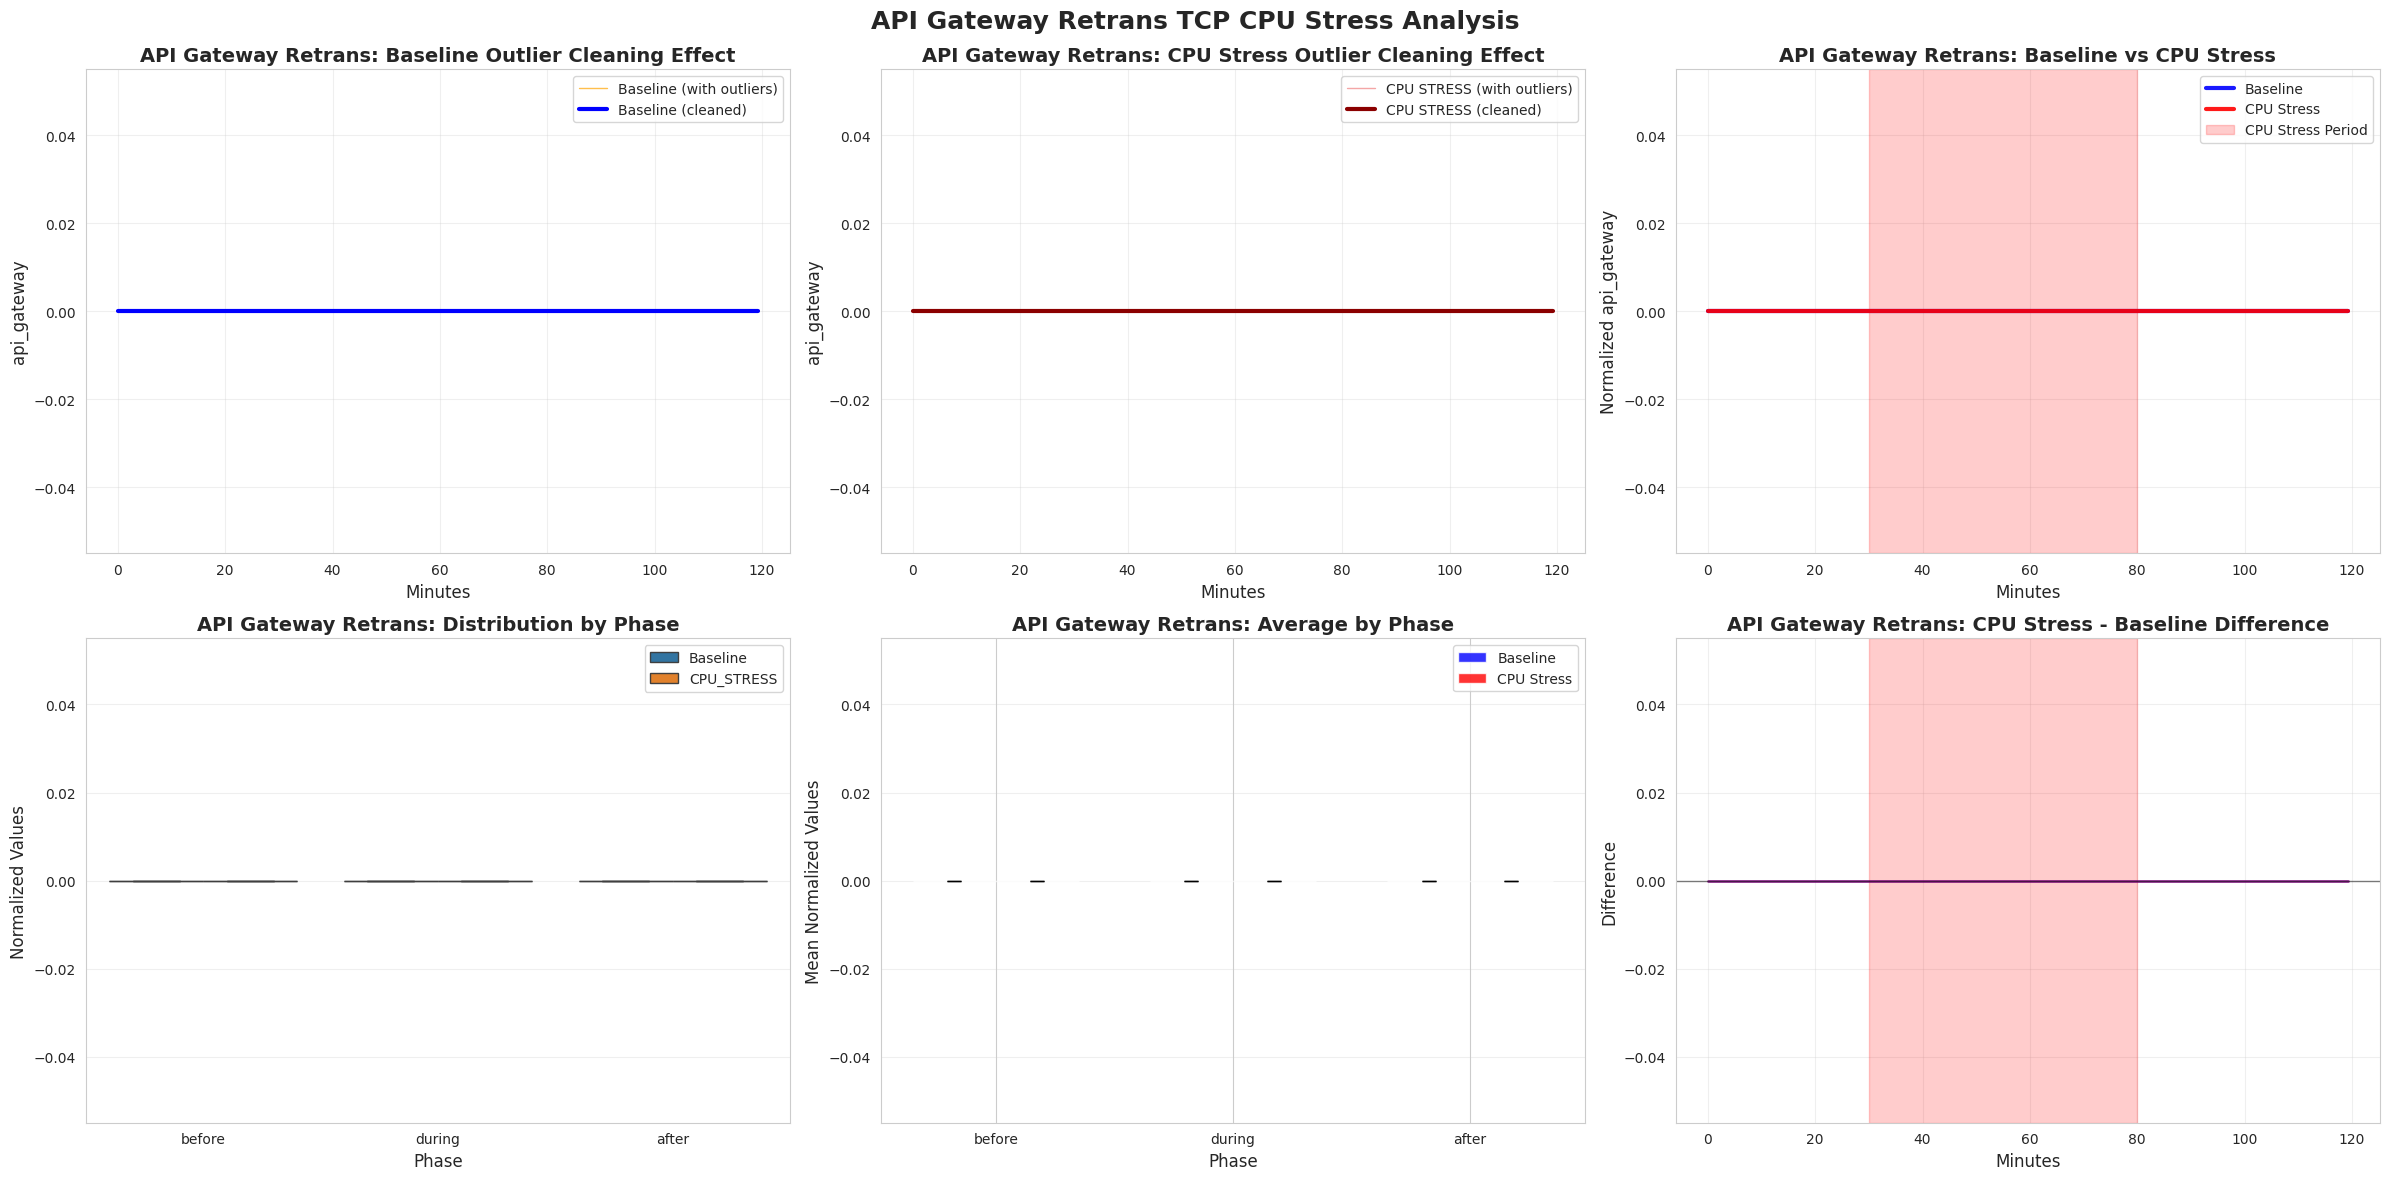


API GATEWAY RETRANS - TCP CPU STRESS ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
        mean  std  min  max
phase                      
after    0.0  0.0    0    0
before   0.0  0.0    0    0
during   0.0  0.0    0    0

📊 CPU STRESS STATISTICS BY PHASE:
        mean  std  min  max
phase                      
after    0.0  0.0    0    0
before   0.0  0.0    0    0
during   0.0  0.0    0    0

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=   nan, p=     nan (❌ NOT SIGNIFICANT)
  DURING  : t=   nan, p=     nan (❌ NOT SIGNIFICANT)
  AFTER   : t=   nan, p=     nan (❌ NOT SIGNIFICANT)

📈 CPU STRESS IMPACT ON TCP (% CHANGE):
  BEFORE  :    +inf% (↗️ INCREASE)
  DURING  :    +inf% (↗️ INCREASE)
  AFTER   :    +inf% (↗️ INCREASE)

🔄 Analyzing Customers Service Retrans...


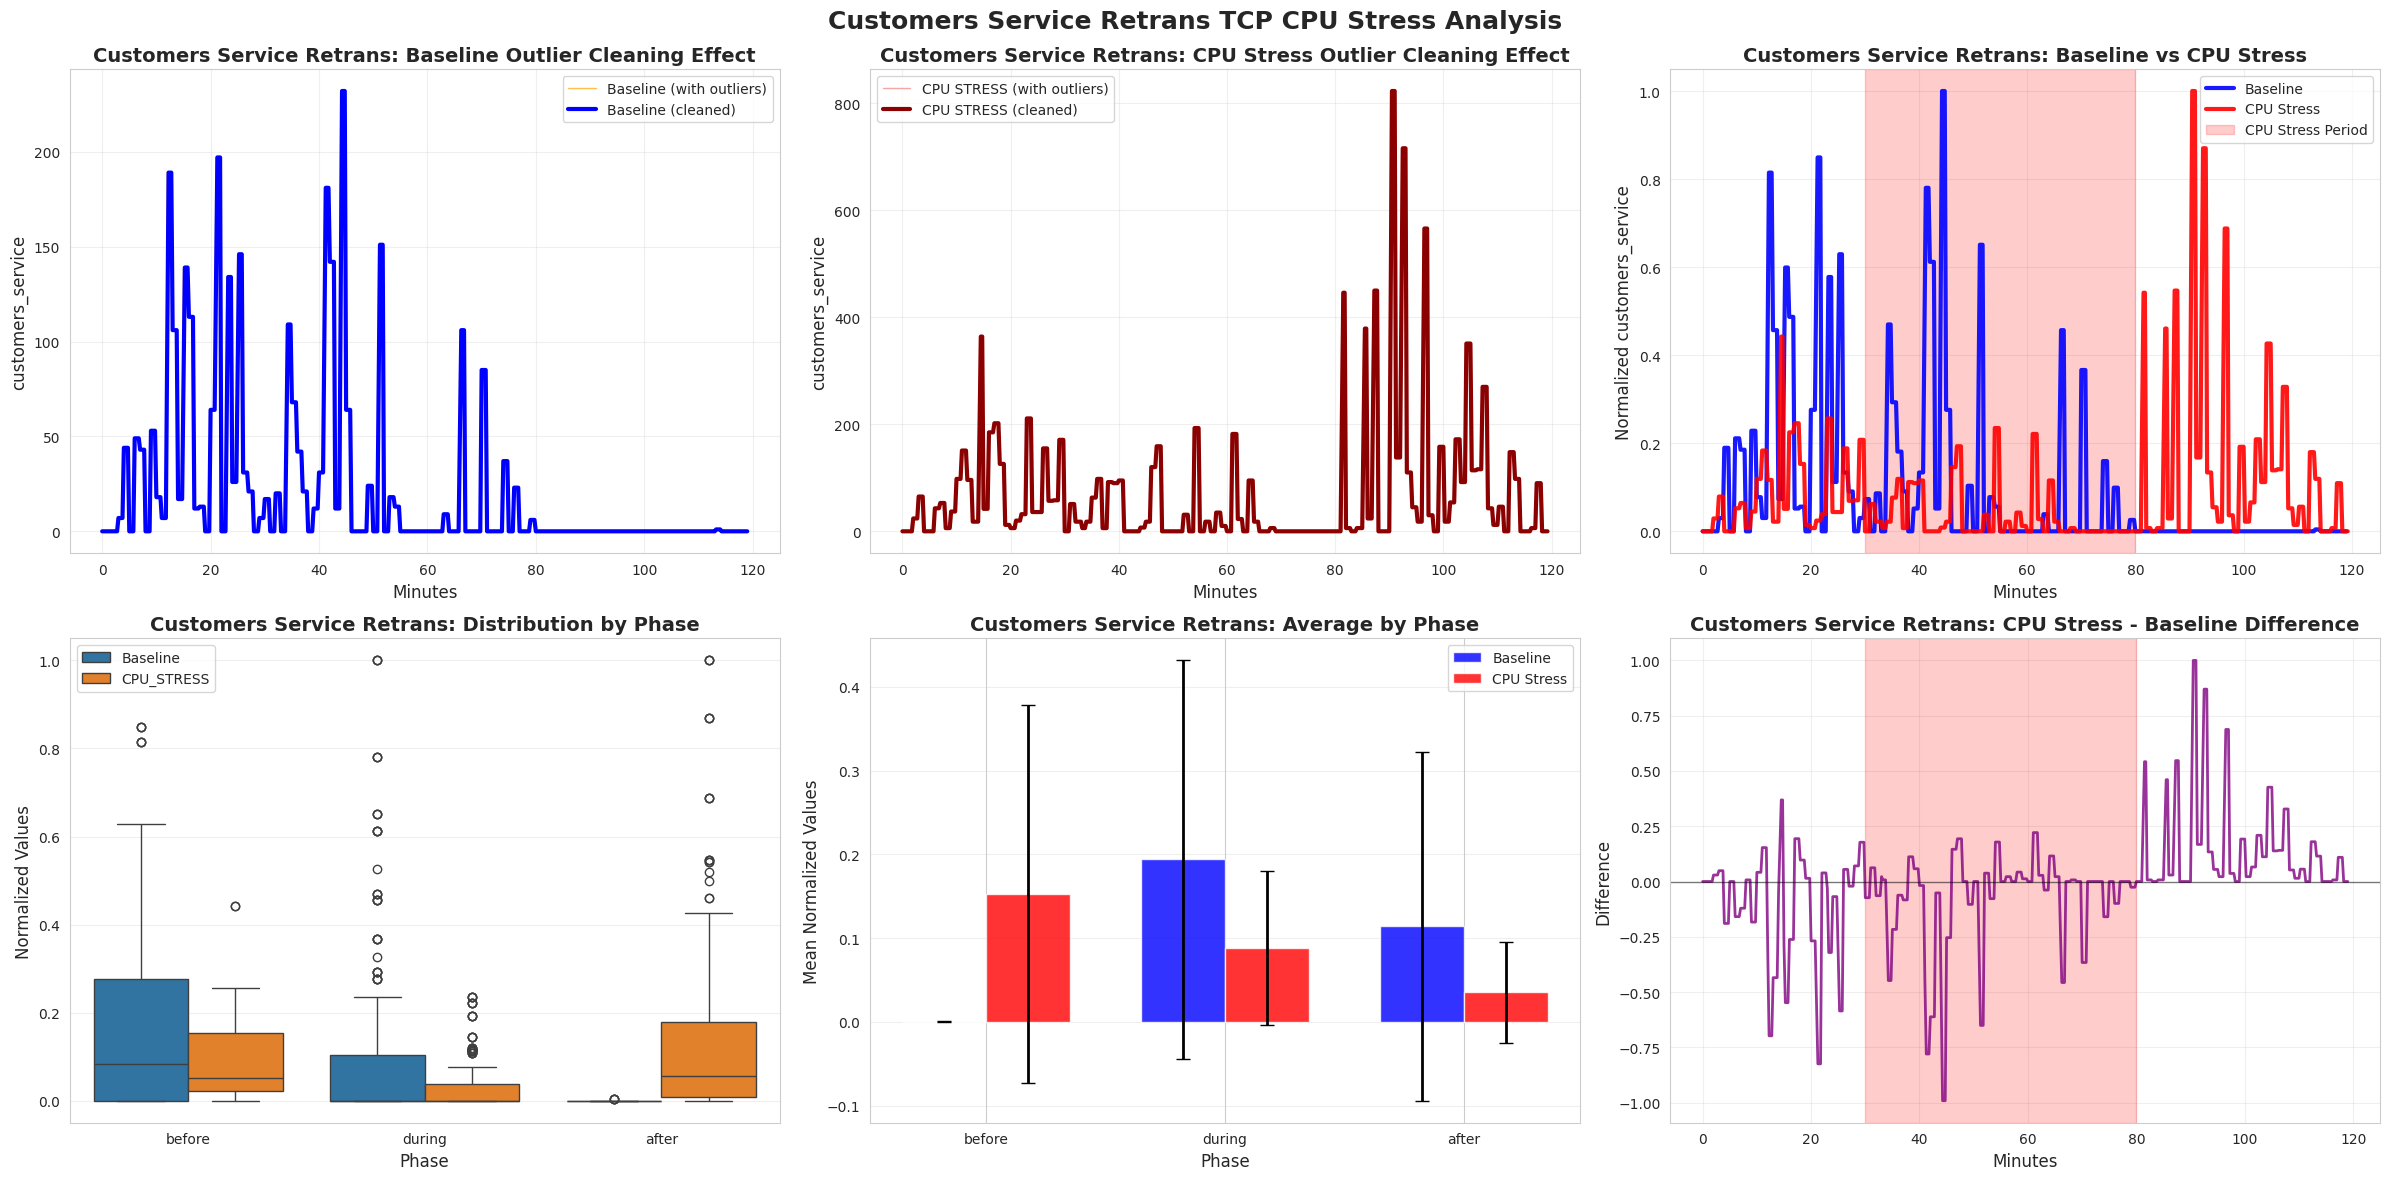


CUSTOMERS SERVICE RETRANS - TCP CPU STRESS ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std  min     max
phase                              
after   0.0001  0.0007  0.0  0.0043
before  0.1939  0.2378  0.0  0.8491
during  0.1142  0.2084  0.0  1.0000

📊 CPU STRESS STATISTICS BY PHASE:
          mean     std  min     max
phase                              
after   0.1530  0.2258  0.0  1.0000
before  0.0881  0.0924  0.0  0.4423
during  0.0352  0.0604  0.0  0.2345

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  4.55, p=  0.0000 (✅ SIGNIFICANT)
  DURING  : t=  5.16, p=  0.0000 (✅ SIGNIFICANT)
  AFTER   : t= -8.50, p=  0.0000 (✅ SIGNIFICANT)

📈 CPU STRESS IMPACT ON TCP (% CHANGE):
  BEFORE  :  -54.59% (↘️ DECREASE)
  DURING  :  -69.18% (↘️ DECREASE)
  AFTER   : +138297.41% (↗️ INCREASE)

🔄 Analyzing Visits Service Retrans...


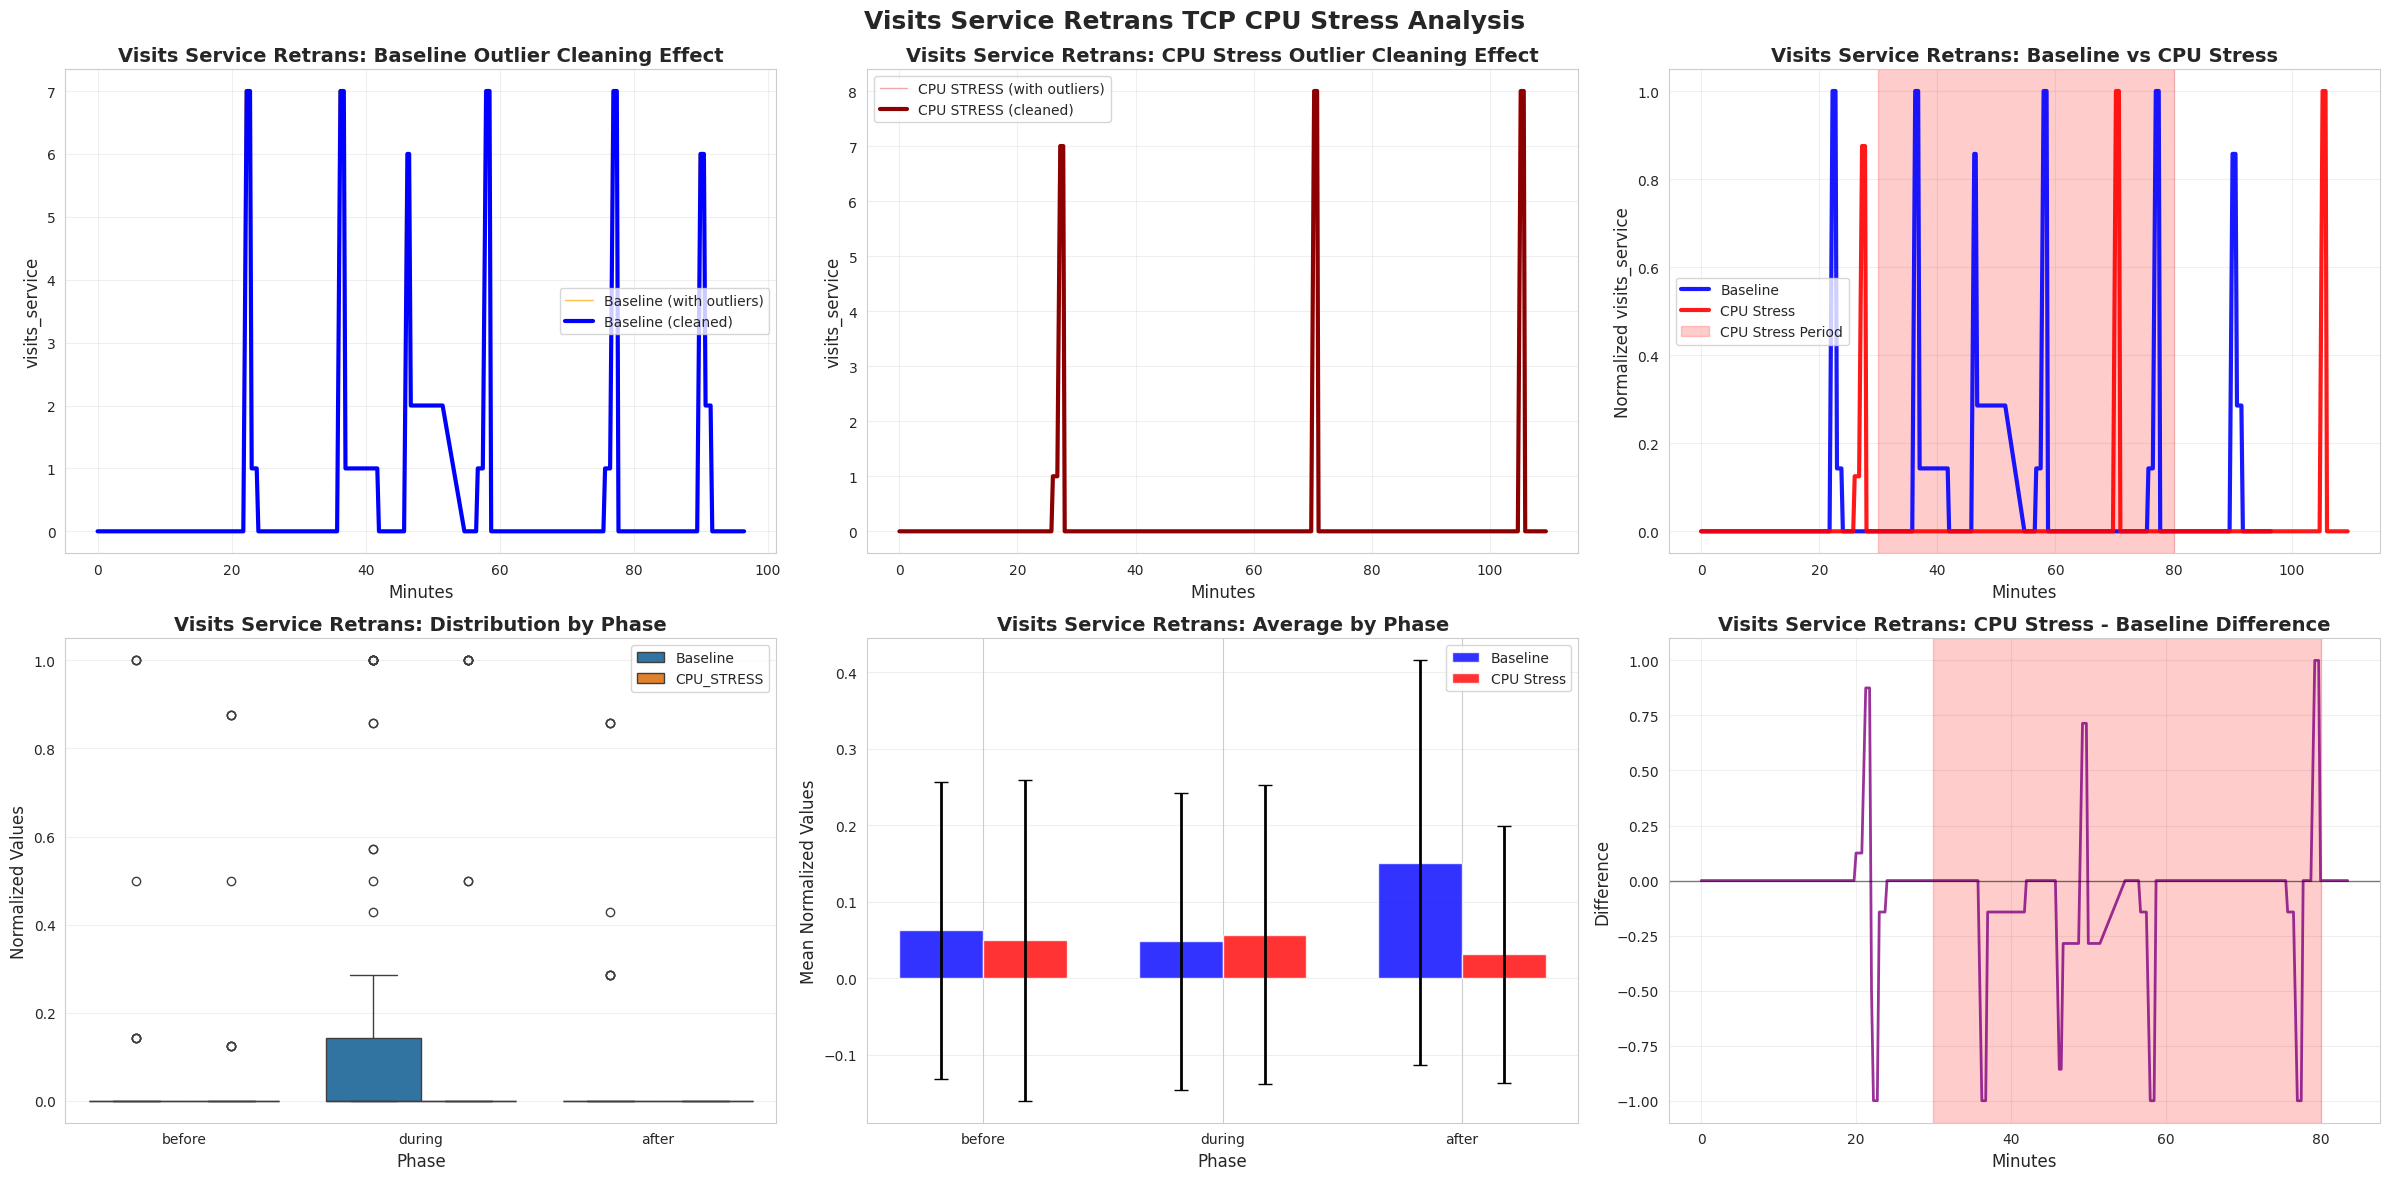


VISITS SERVICE RETRANS - TCP CPU STRESS ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
          mean     std  min     max
phase                              
after   0.0628  0.1943  0.0  0.8571
before  0.0485  0.1943  0.0  1.0000
during  0.1510  0.2646  0.0  1.0000

📊 CPU STRESS STATISTICS BY PHASE:
          mean     std  min    max
phase                             
after   0.0493  0.2097  0.0  1.000
before  0.0566  0.1953  0.0  0.875
during  0.0312  0.1682  0.0  1.000

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=  0.19, p=  0.8513 (❌ NOT SIGNIFICANT)
  DURING  : t=  3.80, p=  0.0002 (✅ SIGNIFICANT)
  AFTER   : t=  1.20, p=  0.2328 (❌ NOT SIGNIFICANT)

📈 CPU STRESS IMPACT ON TCP (% CHANGE):
  BEFORE  :  +16.86% (↗️ INCREASE)
  DURING  :  -79.31% (↘️ DECREASE)
  AFTER   :  -21.47% (↘️ DECREASE)

🔄 Analyzing Vets Service Retrans...


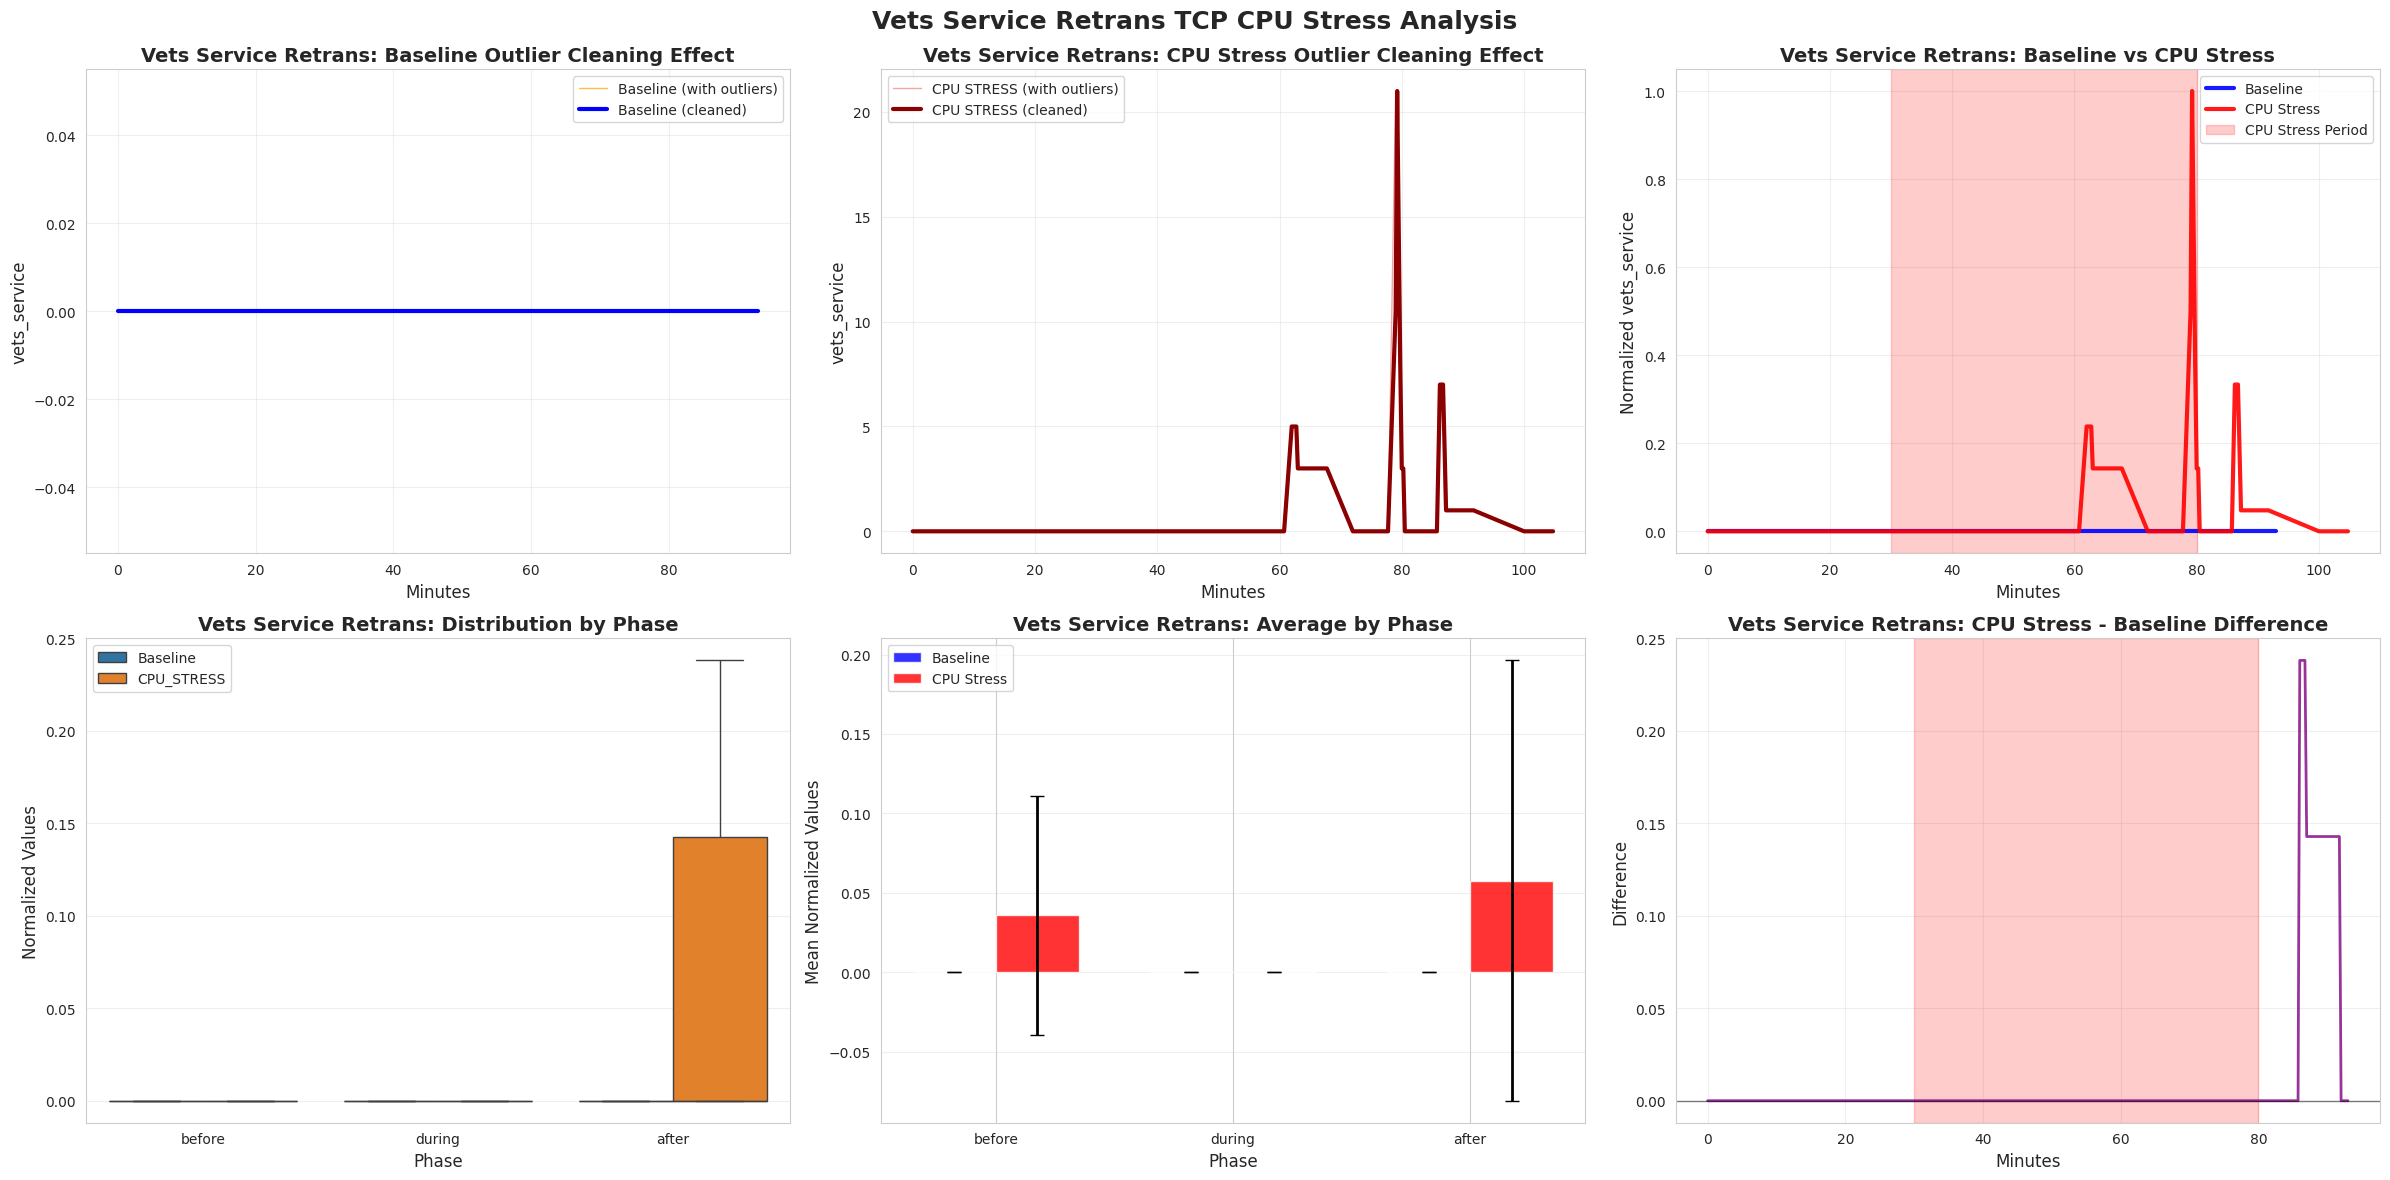


VETS SERVICE RETRANS - TCP CPU STRESS ANALYSIS RESULTS

📊 BASELINE STATISTICS BY PHASE:
        mean  std  min  max
phase                      
after    0.0  0.0    0    0
before   0.0  0.0    0    0
during   0.0  0.0    0    0

📊 CPU STRESS STATISTICS BY PHASE:
          mean     std  min     max
phase                              
after   0.0359  0.0753  0.0  0.3333
before  0.0000  0.0000  0.0  0.0000
during  0.0577  0.1386  0.0  1.0000

🔬 STATISTICAL SIGNIFICANCE TESTS:
  BEFORE  : t=   nan, p=     nan (❌ NOT SIGNIFICANT)
  DURING  : t=   nan, p=     nan (❌ NOT SIGNIFICANT)
  AFTER   : t= -6.32, p=  0.0000 (✅ SIGNIFICANT)

📈 CPU STRESS IMPACT ON TCP (% CHANGE):
  BEFORE  :    +inf% (↗️ INCREASE)
  DURING  :    +inf% (↗️ INCREASE)
  AFTER   :    +inf% (↗️ INCREASE)

COMPREHENSIVE TCP CPU STRESS IMPACT SUMMARY
               TCP_Metric        Phase   Impact (%)      P-Value  Significant  T-Statistic
          SRTT Cumulative       before       -58.8%       0.0000          YES        

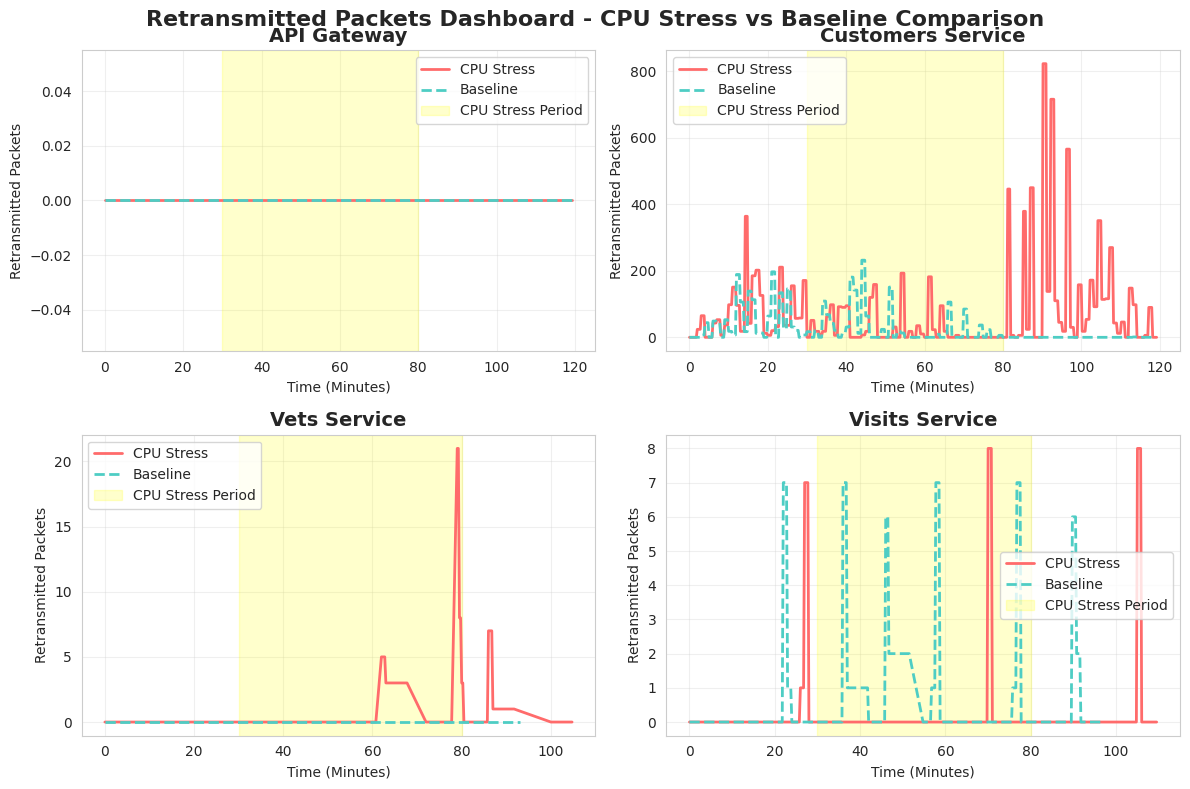

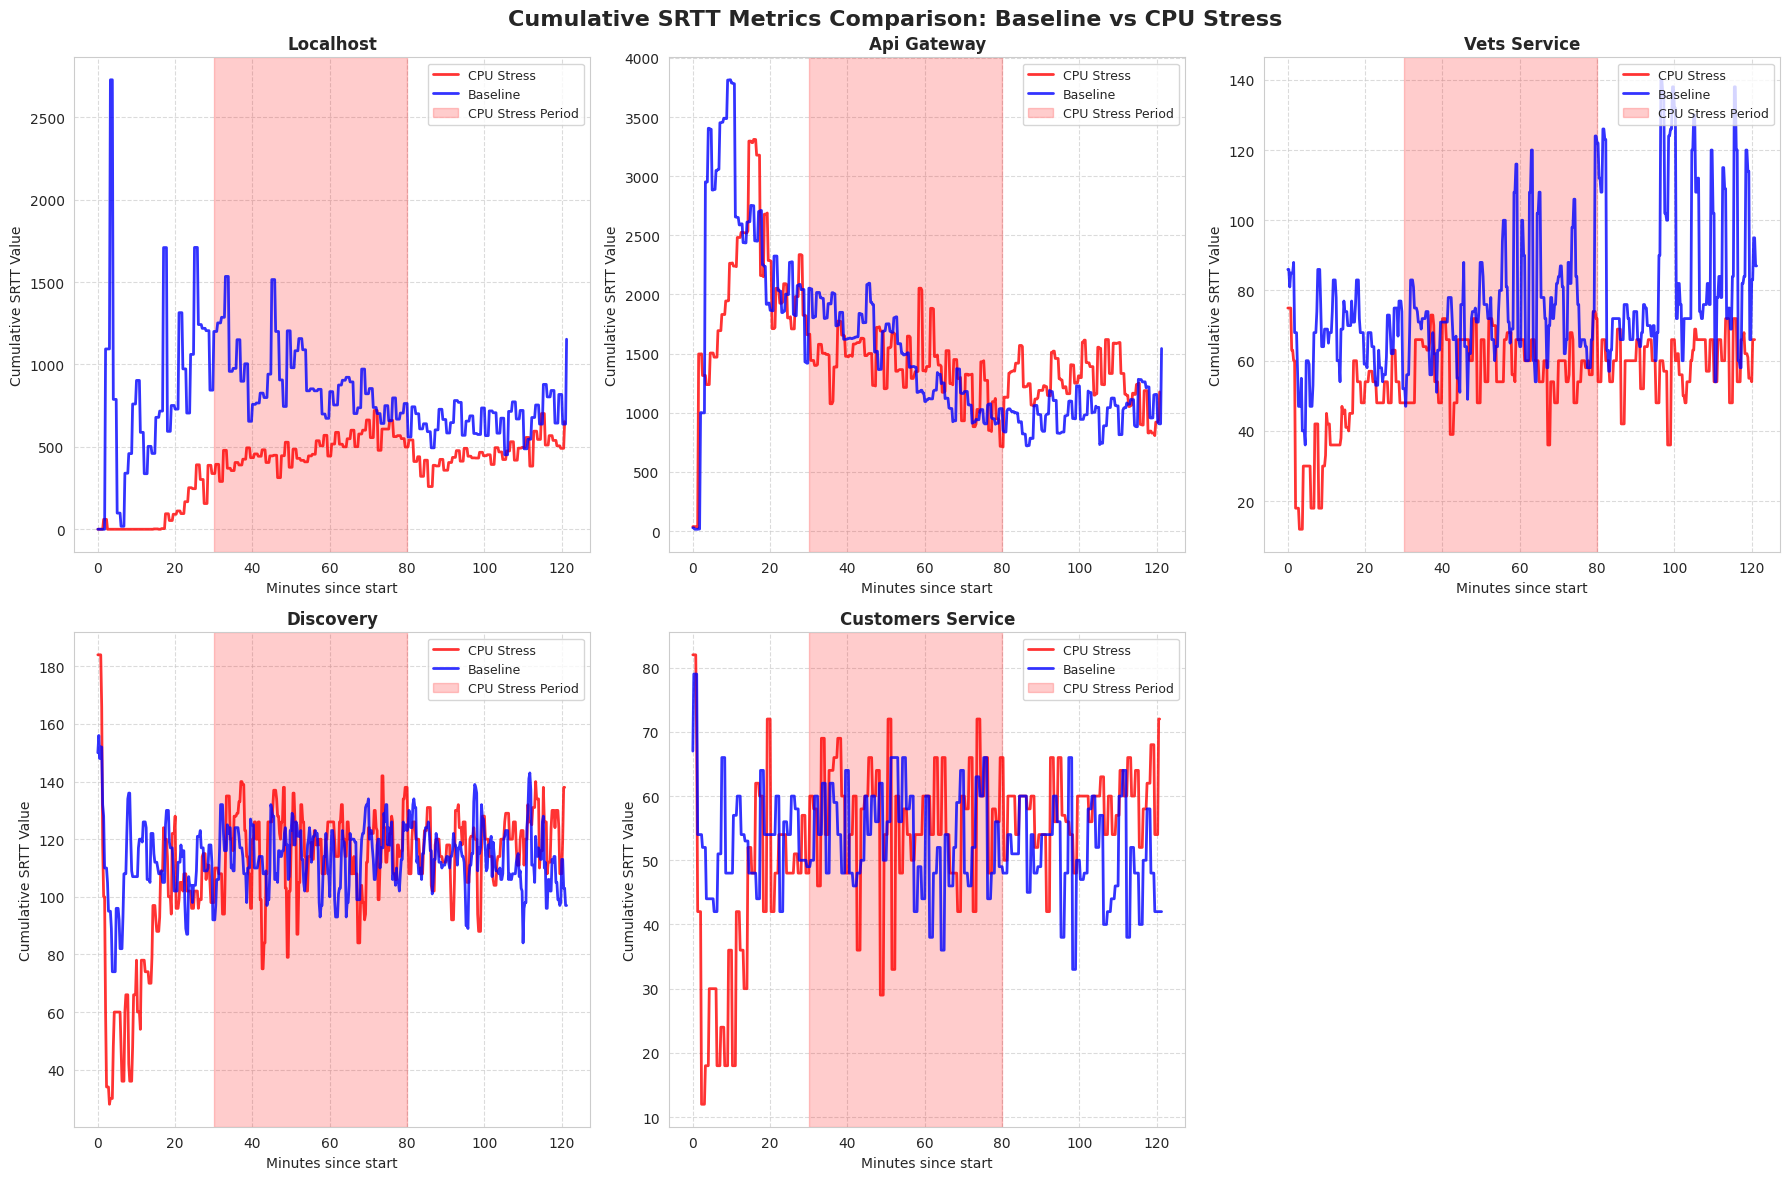

In [10]:
# Complete TCP CPU Stress Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats
import os

# Load SRTT datasets
df_srtt = pd.read_csv("srtt.csv")
df_baseline_srtt = pd.read_csv("../../baseline/tcp related/srtt.csv")

# Load retransmitted packets datasets
df_api_gateway = pd.read_csv('./retrans_packets/api_gateway.csv')
df_customers_service = pd.read_csv('./retrans_packets/customers_service.csv')
df_visits_service = pd.read_csv('./retrans_packets/visits_service.csv')
df_vets_service = pd.read_csv('./retrans_packets/vets_service.csv')

df_api_gateway_baseline = pd.read_csv("../../baseline/tcp related/retrans_packets/api_gateway.csv")
df_customers_service_baseline = pd.read_csv("../../baseline/tcp related/retrans_packets/customers_service.csv")
df_vets_service_baseline = pd.read_csv("../../baseline/tcp related/retrans_packets/vets_service.csv")
df_visits_service_baseline = pd.read_csv("../../baseline/tcp related/retrans_packets/visits_service.csv")

# Add source labels for CPU STRESS experiment
df_srtt["source"] = "CPU_STRESS"
df_api_gateway["source"] = "CPU_STRESS"
df_customers_service["source"] = "CPU_STRESS"
df_visits_service["source"] = "CPU_STRESS"
df_vets_service["source"] = "CPU_STRESS"

df_baseline_srtt["source"] = "BASELINE"
df_api_gateway_baseline["source"] = "BASELINE"
df_customers_service_baseline["source"] = "BASELINE"
df_vets_service_baseline["source"] = "BASELINE"
df_visits_service_baseline["source"] = "BASELINE"

# Convert to datetime
all_datasets = [
    df_srtt, df_api_gateway, df_customers_service, df_visits_service, df_vets_service,
    df_baseline_srtt, df_api_gateway_baseline, df_customers_service_baseline, 
    df_vets_service_baseline, df_visits_service_baseline
]

for df in all_datasets:
    df["Time"] = pd.to_datetime(df["Time"])

delay = 30
duration = 50

# Synchronize test datasets with baseline timeline
time_offset = df_baseline_srtt["Time"].min() - df_srtt["Time"].min()
df_srtt["Time"] += time_offset
df_api_gateway["Time"] += time_offset
df_customers_service["Time"] += time_offset
df_visits_service["Time"] += time_offset
df_vets_service["Time"] += time_offset

# Convert timeline to minutes
for df in all_datasets:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# Create cumulative SRTT metrics
def create_cumulative_metrics(df):
    metric_columns = [col for col in df.columns if col not in ['Time', 'source', 'Minutes']]
    service_groups = {}
    for col in metric_columns:
        if '_client_' in col or '_server_' in col:
            service_name = col.split('_client_')[0] if '_client_' in col else col.split('_server_')[0]
        else:
            service_name = col
        if service_name not in service_groups:
            service_groups[service_name] = []
        service_groups[service_name].append(col)
    cumulative_df = df[['Time', 'Minutes', 'source']].copy()
    for service, columns in service_groups.items():
        cumulative_df[f'{service}_cumulative'] = df[columns].fillna(0).sum(axis=1)
    return cumulative_df

df_srtt_cumulative = create_cumulative_metrics(df_srtt)
df_baseline_srtt_cumulative = create_cumulative_metrics(df_baseline_srtt)

# ORIGINAL DATASETS DICTIONARY
original_datasets = {
    'SRTT Cumulative': {'cpustress': df_srtt_cumulative, 'baseline': df_baseline_srtt_cumulative},
    'API Gateway Retrans': {'cpustress': df_api_gateway, 'baseline': df_api_gateway_baseline},
    'Customers Service Retrans': {'cpustress': df_customers_service, 'baseline': df_customers_service_baseline},
    'Visits Service Retrans': {'cpustress': df_visits_service, 'baseline': df_visits_service_baseline},
    'Vets Service Retrans': {'cpustress': df_vets_service, 'baseline': df_vets_service_baseline}
}

# CONSERVATIVE OUTLIER DETECTION FOR TCP METRICS
def remove_outliers_comprehensive_tcp(df, method='iqr', threshold=1.5):
    df_clean = df.copy()
    outlier_stats = {}
    
    # Get all numeric columns except Time, Minutes, and source
    numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                   if col not in ['Time', 'Minutes']]
    
    if method == 'iqr':
        for col in numeric_cols:
            # Use more conservative threshold for TCP metrics
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            # More conservative bounds - only catch extreme outliers
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            # Additional check: avoid flagging initial system behavior
            # Only flag outliers that are extreme spikes/drops, not gradual changes
            series = df[col]
            outlier_mask = pd.Series(False, index=df.index)
            
            # Find extreme spikes (sudden jumps)
            if len(series) > 1:
                diff = series.diff().abs()
                if diff.std() > 0:  # Avoid division by zero
                    extreme_changes = diff > (3 * diff.std())  # Very large sudden changes
                    extreme_values = (series < lower_bound) | (series > upper_bound)
                    
                    # Only flag as outliers if both conditions are met
                    outlier_mask = extreme_changes & extreme_values
            
            outlier_stats[col] = {
                'count': outlier_mask.sum(),
                'percentage': (outlier_mask.sum() / len(df[col])) * 100,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }
            
            # Only interpolate if we actually found outliers
            if outlier_mask.sum() > 0:
                df_clean.loc[outlier_mask, col] = np.nan
                df_clean[col] = df_clean[col].interpolate(method='linear')
                
    return df_clean, outlier_stats

# APPLY OUTLIER CLEANING
print("=" * 80)
print("OUTLIER DETECTION AND CLEANING - TCP CPU STRESS ANALYSIS")
print("=" * 80)

datasets_clean = {}
all_outlier_stats = {}

for dataset_name, dataset_pair in original_datasets.items():
    datasets_clean[dataset_name] = {}
    all_outlier_stats[dataset_name] = {}
    
    for source_type, df in dataset_pair.items():
        print(f"  🔍 {source_type.upper().replace('_', ' ')}:")
        df_clean, stats = remove_outliers_comprehensive_tcp(df, method='iqr', threshold=2.5)
        datasets_clean[dataset_name][source_type] = df_clean
        all_outlier_stats[dataset_name][source_type] = stats
        
        # Print outlier summary
        total_outliers = sum([s['count'] for s in stats.values()])
        if total_outliers > 0:
            print(f"    ✅ Cleaned {total_outliers} outliers across all TCP metrics")
        else:
            print(f"    ✅ No outliers detected")

# NORMALIZATION FUNCTION
def normalize_df_tcp(df, columns):
    result = df.copy()
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        if max_val > min_val:  
            result[col] = (df[col] - min_val) / (max_val - min_val)
        else:
            result[col] = 0
    return result

# ADD PHASE COLUMN 
def add_phase_column(df, delay_minutes, duration_minutes):
    df = df.copy()
    df['phase'] = 'before'  
    df.loc[(df['Minutes'] >= delay_minutes) & (df['Minutes'] <= delay_minutes + duration_minutes), 'phase'] = 'during'  
    df.loc[df['Minutes'] > delay_minutes + duration_minutes, 'phase'] = 'after' 
    return df

# ANALYSIS AND PLOT FUNCTION FOR TCP CPU STRESS
def analyze_and_plot_tcp_dataset_wide(dataset_name, cpustress_df, baseline_df, delay_minutes, duration_minutes):
    numeric_cols = [col for col in cpustress_df.select_dtypes(include=[np.number]).columns 
                   if col not in ['Time', 'Minutes']]
    
    cpustress_norm = normalize_df_tcp(cpustress_df, numeric_cols)
    baseline_norm = normalize_df_tcp(baseline_df, numeric_cols)
    
    # For TCP metrics, we'll use the main metric or create a composite
    if 'cumulative' in dataset_name.lower():
        cumulative_cols = [col for col in numeric_cols if col.endswith('_cumulative')]
        if cumulative_cols:
            main_metric = cumulative_cols[0]
        else:
            main_metric = numeric_cols[0] if numeric_cols else None
    else:
        main_metric = numeric_cols[0] if numeric_cols else None
    
    if main_metric is None:
        print(f"No numeric columns found for {dataset_name}")
        return None
    
    # Add phase information
    cpustress_norm = add_phase_column(cpustress_norm, delay_minutes, duration_minutes)
    baseline_norm = add_phase_column(baseline_norm, delay_minutes, duration_minutes)
    
    # Statistical analysis
    stats_baseline = baseline_norm.groupby('phase')[main_metric].agg(['mean', 'std', 'min', 'max'])
    stats_cpustress = cpustress_norm.groupby('phase')[main_metric].agg(['mean', 'std', 'min', 'max'])
    
    # Combined dataframe for analysis
    df_combined = pd.DataFrame({
        'Baseline': baseline_norm[main_metric],
        'CPU_STRESS': cpustress_norm[main_metric],
        'Minutes': baseline_norm['Minutes'],
        'phase': baseline_norm['phase'],
        'difference': cpustress_norm[main_metric] - baseline_norm[main_metric]
    })
    
    # T-tests for statistical significance
    t_tests = {}
    for phase in ['before', 'during', 'after']:
        data = df_combined[df_combined['phase'] == phase]
        t_stat, p_value = scipy_stats.ttest_ind(data['Baseline'].dropna(), data['CPU_STRESS'].dropna())
        t_tests[phase] = {'t': t_stat, 'p': p_value}
    
    # Calculate percentage impact
    impact = {}
    for phase in ['before', 'during', 'after']:
        baseline_mean = stats_baseline.loc[phase, 'mean']
        cpustress_mean = stats_cpustress.loc[phase, 'mean']
        impact[phase] = ((cpustress_mean - baseline_mean) / baseline_mean) * 100 if baseline_mean != 0 else float('inf')
    
    # PLOTTING
    fig = plt.figure(figsize=(24, 12))
    
    # 1. Baseline outlier cleaning effect
    plt.subplot(2, 3, 1)
    original_baseline = original_datasets[dataset_name]['baseline']
    
    plt.plot(original_baseline['Minutes'], original_baseline[main_metric], 
             label='Baseline (with outliers)', color='orange', alpha=0.7, linewidth=1)
    plt.plot(baseline_df['Minutes'], baseline_df[main_metric], 
             label='Baseline (cleaned)', linewidth=3, color='blue')
    plt.title(f'{dataset_name}: Baseline Outlier Cleaning Effect', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(f'{main_metric}', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 2. CPU STRESS outlier cleaning effect
    plt.subplot(2, 3, 2)
    original_cpustress = original_datasets[dataset_name]['cpustress']
    
    plt.plot(original_cpustress['Minutes'], original_cpustress[main_metric], 
             label='CPU STRESS (with outliers)', alpha=0.7, color='lightcoral', linewidth=1)
    plt.plot(cpustress_df['Minutes'], cpustress_df[main_metric], 
             label='CPU STRESS (cleaned)', linewidth=3, color='darkred')
    plt.title(f'{dataset_name}: CPU Stress Outlier Cleaning Effect', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel(f'{main_metric}', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 3. Timeline comparison
    plt.subplot(2, 3, 3)
    plt.plot(baseline_norm['Minutes'], baseline_norm[main_metric], 
             label='Baseline', linewidth=3, color='blue', alpha=0.9)
    plt.plot(cpustress_norm['Minutes'], cpustress_norm[main_metric], 
             label='CPU Stress', linewidth=3, color='red', alpha=0.9)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2, label="CPU Stress Period")
    plt.title(f"{dataset_name}: Baseline vs CPU Stress", fontsize=14, fontweight='bold')
    plt.xlabel("Minutes", fontsize=12)
    plt.ylabel(f"Normalized {main_metric}", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    # 4. Box plot by phase
    plt.subplot(2, 3, 4)
    box_data = pd.melt(df_combined[['Baseline', 'CPU_STRESS', 'phase']], 
                      id_vars=['phase'], var_name='source', value_name='value')
    sns.boxplot(x='phase', y='value', hue='source', data=box_data, ax=plt.gca())
    plt.title(f'{dataset_name}: Distribution by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Normalized Values', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.legend(fontsize=10)
    
    # 5. Statistics by phase
    plt.subplot(2, 3, 5)
    phases = ['before', 'during', 'after']
    x = np.arange(len(phases))
    width = 0.35
    
    bars1 = plt.bar(x - width/2, stats_baseline['mean'], width, label='Baseline', alpha=0.8, color='blue')
    bars2 = plt.bar(x + width/2, stats_cpustress['mean'], width, label='CPU Stress', alpha=0.8, color='red')
    
    plt.errorbar(x - width/2, stats_baseline['mean'], yerr=stats_baseline['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    plt.errorbar(x + width/2, stats_cpustress['mean'], yerr=stats_cpustress['std'], 
                fmt='none', ecolor='black', capsize=5, linewidth=2)
    
    plt.title(f'{dataset_name}: Average by Phase', fontsize=14, fontweight='bold')
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Mean Normalized Values', fontsize=12)
    plt.xticks(x, phases)
    plt.legend(fontsize=10)
    plt.grid(axis='y', alpha=0.3)
    
    # 6. Difference over time
    plt.subplot(2, 3, 6)
    plt.plot(df_combined['Minutes'], df_combined['difference'], 
             color='purple', linewidth=2, alpha=0.8)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1)
    plt.axvspan(delay_minutes, delay_minutes + duration_minutes, 
                color='red', alpha=0.2)
    plt.title(f'{dataset_name}: CPU Stress - Baseline Difference', fontsize=14, fontweight='bold')
    plt.xlabel('Minutes', fontsize=12)
    plt.ylabel('Difference', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.suptitle(f'{dataset_name} TCP CPU Stress Analysis', 
                fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()
    
    # Print statistical results
    print(f"\n{'='*80}")
    print(f"{dataset_name.upper()} - TCP CPU STRESS ANALYSIS RESULTS")
    print(f"{'='*80}")
    
    print(f"\n📊 BASELINE STATISTICS BY PHASE:")
    print(stats_baseline.round(4))
    
    print(f"\n📊 CPU STRESS STATISTICS BY PHASE:")
    print(stats_cpustress.round(4))
    
    print(f"\n🔬 STATISTICAL SIGNIFICANCE TESTS:")
    for phase, test in t_tests.items():
        sig = "✅ SIGNIFICANT" if test['p'] < 0.05 else "❌ NOT SIGNIFICANT"
        print(f"  {phase.upper():8}: t={test['t']:6.2f}, p={test['p']:8.4f} ({sig})")
    
    print(f"\n📈 CPU STRESS IMPACT ON TCP (% CHANGE):")
    for phase, change in impact.items():
        direction = "↗️ INCREASE" if change > 0 else "↘️ DECREASE" if change < 0 else "→ NO CHANGE"
        print(f"  {phase.upper():8}: {change:+7.2f}% ({direction})")
    
    return {
        'stats_baseline': stats_baseline,
        'stats_cpustress': stats_cpustress,
        't_tests': t_tests,
        'impact': impact,
        'combined_data': df_combined,
        'main_metric': main_metric
    }

# RUN ANALYSIS 
print(f"\n{'='*80}")
print("COMPREHENSIVE TCP CPU STRESS ANALYSIS")
print(f"{'='*80}")

analysis_results = {}

for dataset_name in datasets_clean.keys():
    print(f"\n🔄 Analyzing {dataset_name}...")
    
    cpustress_clean = datasets_clean[dataset_name]['cpustress']
    baseline_clean = datasets_clean[dataset_name]['baseline']
    
    analysis_results[dataset_name] = analyze_and_plot_tcp_dataset_wide(
        dataset_name, 
        cpustress_clean, 
        baseline_clean, 
        delay, 
        duration
    )

# FINAL  SUMMARY
print(f"\n{'='*100}")
print("COMPREHENSIVE TCP CPU STRESS IMPACT SUMMARY")
print(f"{'='*100}")

summary_table = []
for dataset_name, results in analysis_results.items():
    if results:  # Check if analysis was successful
        for phase in ['before', 'during', 'after']:
            summary_table.append({
                'TCP_Metric': dataset_name,
                'Phase': phase,
                'Impact (%)': f"{results['impact'][phase]:+.1f}%",
                'P-Value': f"{results['t_tests'][phase]['p']:.4f}",
                'Significant': 'YES' if results['t_tests'][phase]['p'] < 0.05 else 'NO',
                'T-Statistic': f"{results['t_tests'][phase]['t']:.2f}"
            })

if summary_table:
    summary_df = pd.DataFrame(summary_table)
    print(summary_df.to_string(index=False, col_space=12))

# Retransmitted packets dashboard
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Retransmitted Packets Dashboard - CPU Stress vs Baseline Comparison', fontsize=16, fontweight='bold')

retrans_datasets = [
    ('API Gateway', df_api_gateway, df_api_gateway_baseline, 'api_gateway'),
    ('Customers Service', df_customers_service, df_customers_service_baseline, 'customers_service'),
    ('Vets Service', df_vets_service, df_vets_service_baseline, 'vets_service'),
    ('Visits Service', df_visits_service, df_visits_service_baseline, 'visits_service')
]

for i, (title, test_df, baseline_df, metric_col) in enumerate(retrans_datasets):
    ax = axes[i//2, i%2]
    ax.plot(test_df['Minutes'], test_df[metric_col], 
           label='CPU Stress', linewidth=2, color='#FF6B6B')
    ax.plot(baseline_df['Minutes'], baseline_df[metric_col], 
           label='Baseline', linewidth=2, color='#4ECDC4', linestyle='--')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Time (Minutes)')
    ax.set_ylabel('Retransmitted Packets')
    ax.axvspan(delay, delay + duration, color='yellow', alpha=0.2, label="CPU Stress Period")
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# SRTT cumulative visualization
cumulative_metrics = [col for col in df_srtt_cumulative.columns if col.endswith('_cumulative')]
key_cumulative_metrics = cumulative_metrics[:5] if len(cumulative_metrics) >= 5 else cumulative_metrics

if key_cumulative_metrics:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Cumulative SRTT Metrics Comparison: Baseline vs CPU Stress', fontsize=16, fontweight='bold')
    axes_flat = axes.flatten()

    for i, metric in enumerate(key_cumulative_metrics):
        if i < len(axes_flat):
            ax = axes_flat[i]
            ax.plot(df_srtt_cumulative["Minutes"], df_srtt_cumulative[metric], 
                   label="CPU Stress", color='red', linewidth=2, alpha=0.8)
            ax.plot(df_baseline_srtt_cumulative["Minutes"], df_baseline_srtt_cumulative[metric], 
                   label="Baseline", color='blue', linewidth=2, alpha=0.8)
            ax.axvspan(delay, delay + duration, color='red', alpha=0.2, label="CPU Stress Period")
            service_name = metric.replace('_cumulative', '').replace('_', ' ').title()
            ax.set_title(f'{service_name}', fontsize=12, fontweight='bold')
            ax.set_xlabel("Minutes since start", fontsize=10)
            ax.set_ylabel("Cumulative SRTT Value", fontsize=10)
            ax.grid(True, linestyle='--', alpha=0.7)
            ax.legend(loc='upper right', fontsize=9)

    for i in range(len(key_cumulative_metrics), len(axes_flat)):
        fig.delaxes(axes_flat[i])

    plt.tight_layout()
    plt.show()

## SRTT

/tmp/ipykernel_26336/2408588446.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cumulative_df[f'{service}_cumulative'] = df[columns].fillna(0).sum(axis=1)
/tmp/ipykernel_26336/2408588446.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cumulative_df[f'{service}_cumulative'] = df[columns].fillna(0).sum(axis=1)
/tmp/ipykernel_26336/2408588446.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns

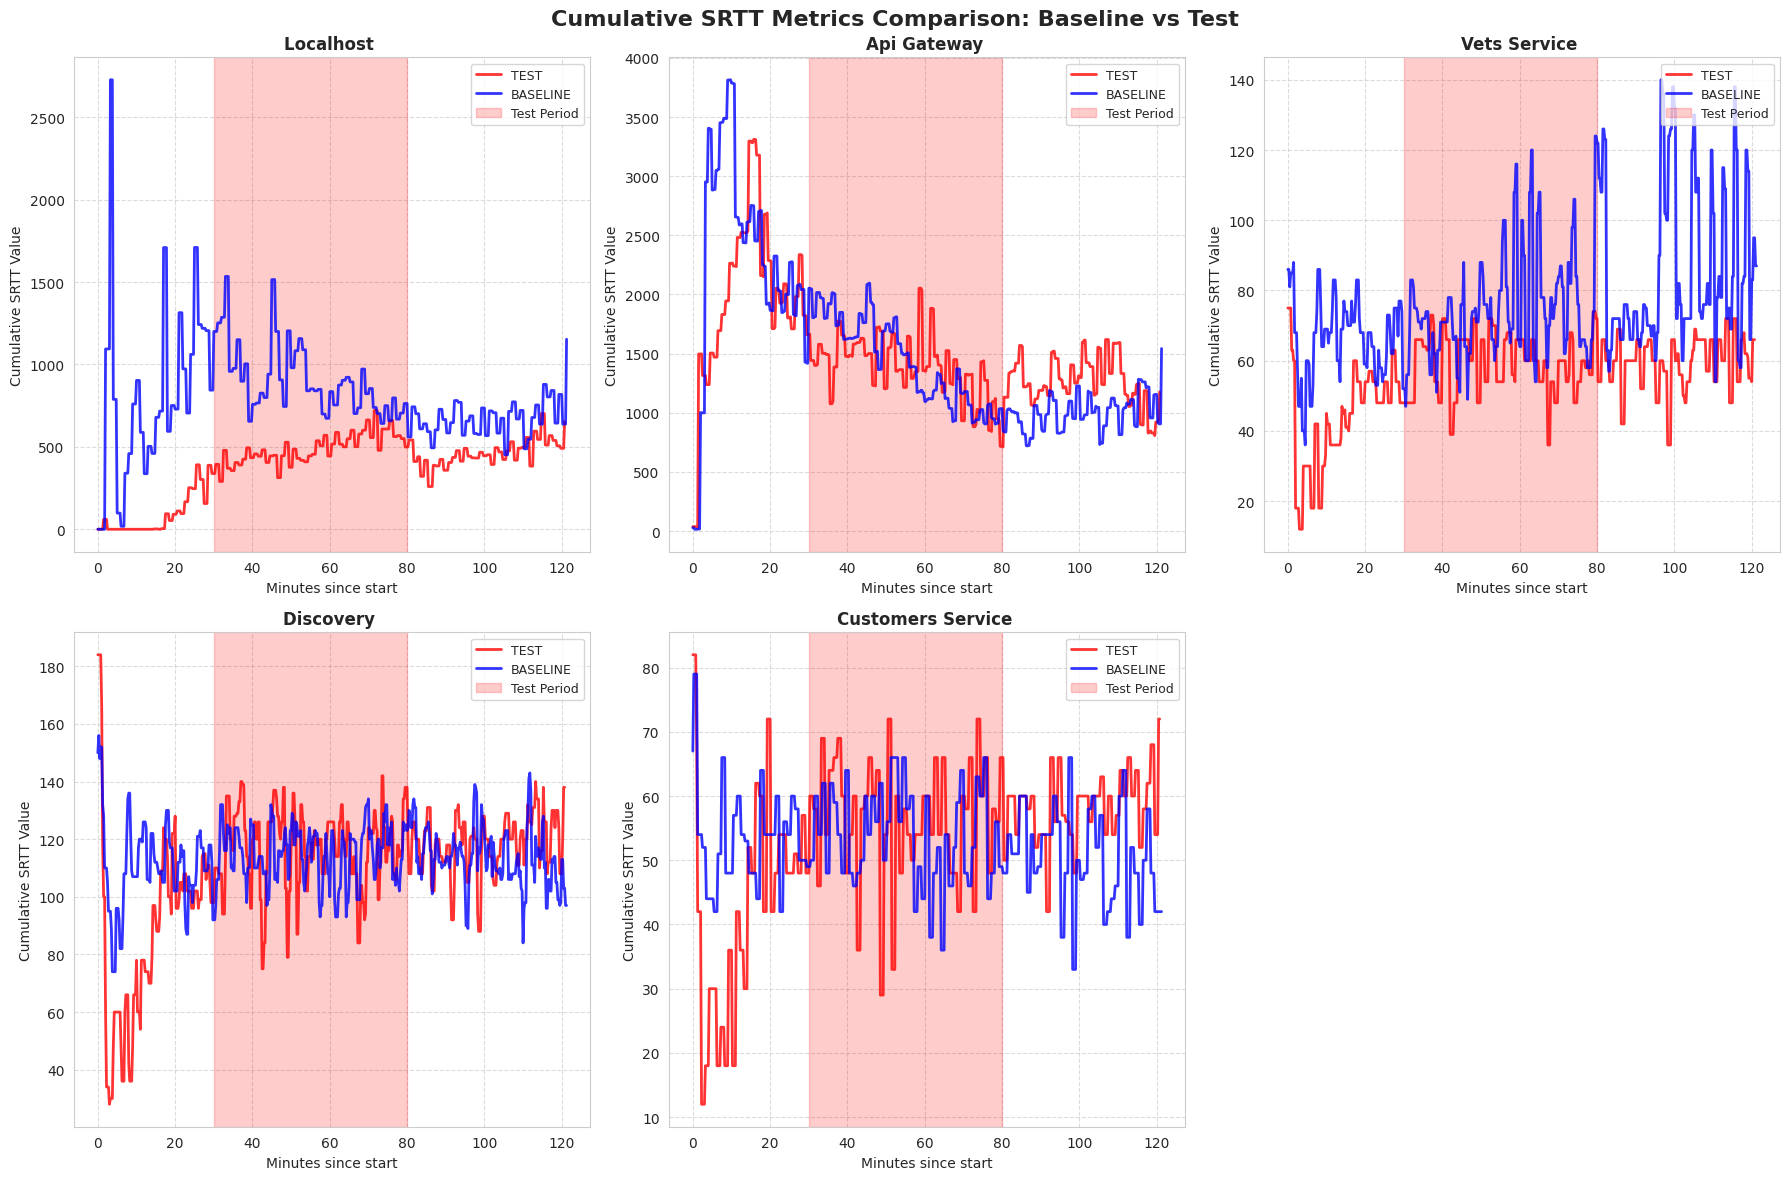

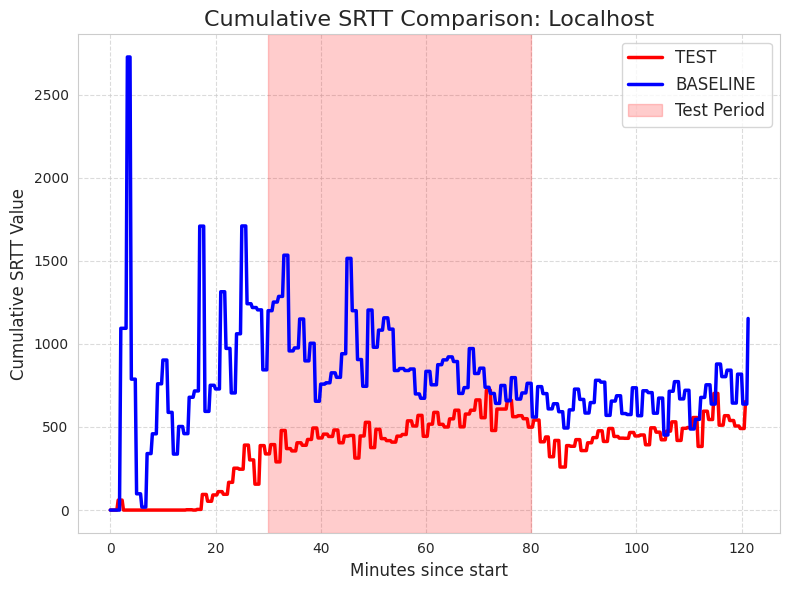

/tmp/ipykernel_26336/2408588446.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test_cumulative['total_system_srtt'] = df_test_cumulative[cumulative_metrics].sum(axis=1)
/tmp/ipykernel_26336/2408588446.py:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_baseline_cumulative['total_system_srtt'] = df_baseline_cumulative[cumulative_metrics].sum(axis=1)


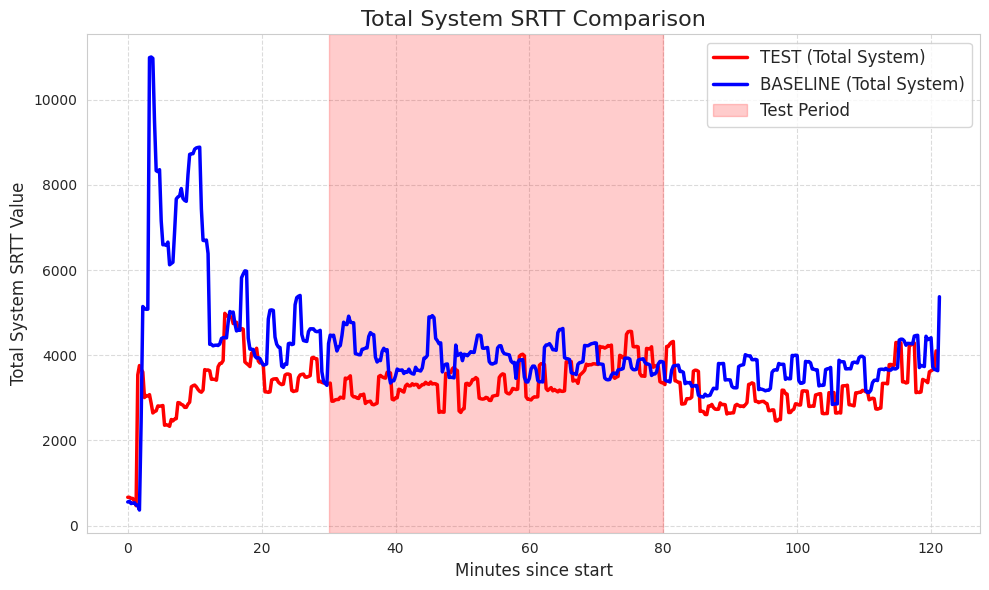

In [11]:
df_test = pd.read_csv("srtt.csv")
df_baseline = pd.read_csv("../../baseline/tcp related/srtt.csv")

df_test["source"] = "TEST"
df_baseline["source"] = "BASELINE"

df_test["Time"] = pd.to_datetime(df_test["Time"])
df_baseline["Time"] = pd.to_datetime(df_baseline["Time"])

df_test["Minutes"] = (df_test["Time"] - df_test["Time"].min()).dt.total_seconds() / 60
df_baseline["Minutes"] = (df_baseline["Time"] - df_baseline["Time"].min()).dt.total_seconds() / 60

delay = 30
duration = 50

def create_cumulative_metrics(df):
    metric_columns = [col for col in df.columns if col not in ['Time', 'source', 'Minutes']]
    service_groups = {}
    for col in metric_columns:
        if '_client_' in col or '_server_' in col:
            service_name = col.split('_client_')[0] if '_client_' in col else col.split('_server_')[0]
        else:
            service_name = col
        if service_name not in service_groups:
            service_groups[service_name] = []
        service_groups[service_name].append(col)
    cumulative_df = df[['Time', 'Minutes', 'source']].copy()
    for service, columns in service_groups.items():
        cumulative_df[f'{service}_cumulative'] = df[columns].fillna(0).sum(axis=1)
    return cumulative_df

df_test_cumulative = create_cumulative_metrics(df_test)
df_baseline_cumulative = create_cumulative_metrics(df_baseline)

cumulative_metrics = [col for col in df_test_cumulative.columns if col.endswith('_cumulative')]
key_cumulative_metrics = cumulative_metrics[:5]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Cumulative SRTT Metrics Comparison: Baseline vs Test', fontsize=16, fontweight='bold')
axes_flat = axes.flatten()

for i, metric in enumerate(key_cumulative_metrics):
    if i < len(axes_flat):
        ax = axes_flat[i]
        ax.plot(df_test_cumulative["Minutes"], df_test_cumulative[metric], label="TEST", color='red', linewidth=2, alpha=0.8)
        ax.plot(df_baseline_cumulative["Minutes"], df_baseline_cumulative[metric], label="BASELINE", color='blue', linewidth=2, alpha=0.8)
        ax.axvspan(delay, delay + duration, color='red', alpha=0.2, label="Test Period")
        service_name = metric.replace('_cumulative', '').replace('_', ' ').title()
        ax.set_title(f'{service_name} ', fontsize=12, fontweight='bold')
        ax.set_xlabel("Minutes since start", fontsize=10)
        ax.set_ylabel("Cumulative SRTT Value", fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend(loc='upper right', fontsize=9)

for i in range(len(key_cumulative_metrics), len(axes_flat)):
    fig.delaxes(axes_flat[i])

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

if key_cumulative_metrics:
    metric_focus = key_cumulative_metrics[0]
    plt.plot(df_test_cumulative["Minutes"], df_test_cumulative[metric_focus], label="TEST", color='red', linewidth=2.5)
    plt.plot(df_baseline_cumulative["Minutes"], df_baseline_cumulative[metric_focus], label="BASELINE", color='blue', linewidth=2.5)
    plt.axvspan(delay, delay + duration, color='red', alpha=0.2, label="Test Period")
    service_name = metric_focus.replace('_cumulative', '').replace('_', ' ').title()
    plt.title(f"Cumulative SRTT Comparison: {service_name}", fontsize=16)
    plt.xlabel("Minutes since start", fontsize=12)
    plt.ylabel("Cumulative SRTT Value", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='upper right', fontsize=12)
    plt.tight_layout()
    plt.show()

df_test_cumulative['total_system_srtt'] = df_test_cumulative[cumulative_metrics].sum(axis=1)
df_baseline_cumulative['total_system_srtt'] = df_baseline_cumulative[cumulative_metrics].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(df_test_cumulative["Minutes"], df_test_cumulative['total_system_srtt'], label="TEST (Total System)", color='red', linewidth=2.5)
plt.plot(df_baseline_cumulative["Minutes"], df_baseline_cumulative['total_system_srtt'], label="BASELINE (Total System)", color='blue', linewidth=2.5)
plt.axvspan(delay, delay + duration, color='red', alpha=0.2, label="Test Period")
plt.title("Total System SRTT Comparison", fontsize=16)
plt.xlabel("Minutes since start", fontsize=12)
plt.ylabel("Total System SRTT Value", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


## retransmitted packets

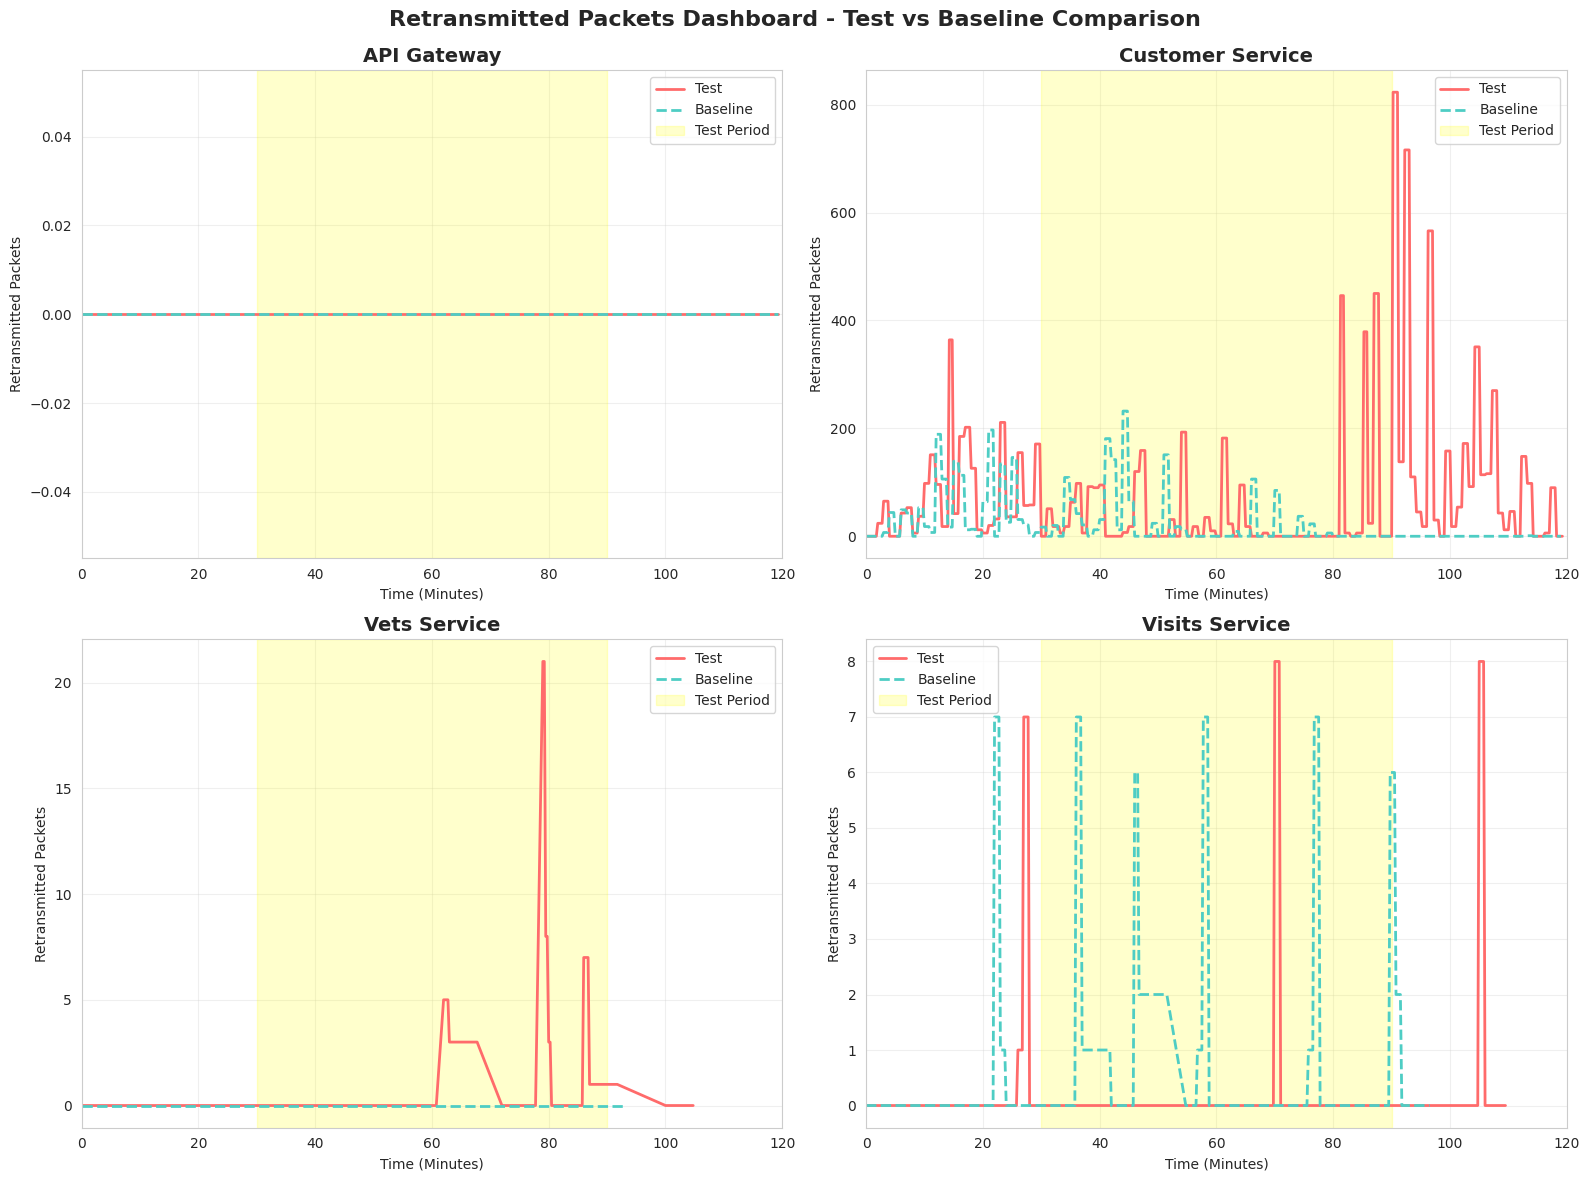

In [12]:
df_api_gateway = pd.read_csv('./retrans_packets/api_gateway.csv')
df_customers_service = pd.read_csv('./retrans_packets/customers_service.csv')
df_visits_service = pd.read_csv('./retrans_packets/visits_service.csv')
df_vets_service = pd.read_csv('./retrans_packets/vets_service.csv')

df_api_gateway_baseline = pd.read_csv("../../baseline/tcp related/retrans_packets/api_gateway.csv")
df_customers_service_baseline = pd.read_csv("../../baseline/tcp related/retrans_packets/customers_service.csv")
df_vets_service_baseline = pd.read_csv("../../baseline/tcp related/retrans_packets/vets_service.csv")
df_visits_service_baseline = pd.read_csv("../../baseline/tcp related/retrans_packets/visits_service.csv")

datasets = [
    df_api_gateway, df_customers_service, df_vets_service, df_visits_service,
    df_api_gateway_baseline, df_customers_service_baseline, df_vets_service_baseline, df_visits_service_baseline
]

for df in datasets:
    df['Time'] = pd.to_datetime(df['Time'])

df_api_gateway['Minutes'] = (df_api_gateway['Time'] - df_api_gateway['Time'].min()).dt.total_seconds() / 60
df_customers_service['Minutes'] = (df_customers_service['Time'] - df_customers_service['Time'].min()).dt.total_seconds() / 60
df_vets_service['Minutes'] = (df_vets_service['Time'] - df_vets_service['Time'].min()).dt.total_seconds() / 60
df_visits_service['Minutes'] = (df_visits_service['Time'] - df_visits_service['Time'].min()).dt.total_seconds() / 60

df_api_gateway_baseline['Minutes'] = (df_api_gateway_baseline['Time'] - df_api_gateway_baseline['Time'].min()).dt.total_seconds() / 60
df_customers_service_baseline['Minutes'] = (df_customers_service_baseline['Time'] - df_customers_service_baseline['Time'].min()).dt.total_seconds() / 60
df_vets_service_baseline['Minutes'] = (df_vets_service_baseline['Time'] - df_vets_service_baseline['Time'].min()).dt.total_seconds() / 60
df_visits_service_baseline['Minutes'] = (df_visits_service_baseline['Time'] - df_visits_service_baseline['Time'].min()).dt.total_seconds() / 60

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Retransmitted Packets Dashboard - Test vs Baseline Comparison', fontsize=16, fontweight='bold')

test_color = '#FF6B6B'      # Red for test
baseline_color = '#4ECDC4'   # Teal for baseline

ax1 = axes[0, 0]
ax1.plot(df_api_gateway['Minutes'], df_api_gateway['api_gateway'], 
         label='Test', linewidth=2, color=test_color)
ax1.plot(df_api_gateway_baseline['Minutes'], df_api_gateway_baseline['api_gateway'], 
         label='Baseline', linewidth=2, color=baseline_color, linestyle='--')
ax1.set_title('API Gateway', fontsize=14, fontweight='bold')
ax1.set_xlabel('Time (Minutes)')
ax1.set_ylabel('Retransmitted Packets')
ax1.axvspan(30, 90, color='yellow', alpha=0.2, label="Test Period")
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 120)

ax2 = axes[0, 1]
ax2.plot(df_customers_service['Minutes'], df_customers_service['customers_service'], 
         label='Test', linewidth=2, color=test_color)
ax2.plot(df_customers_service_baseline['Minutes'], df_customers_service_baseline['customers_service'], 
         label='Baseline', linewidth=2, color=baseline_color, linestyle='--')
ax2.set_title('Customer Service', fontsize=14, fontweight='bold')
ax2.set_xlabel('Time (Minutes)')
ax2.axvspan(30, 90, color='yellow', alpha=0.2, label="Test Period")
ax2.set_ylabel('Retransmitted Packets')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 120)

ax3 = axes[1, 0]
ax3.plot(df_vets_service['Minutes'], df_vets_service['vets_service'], 
         label='Test', linewidth=2, color=test_color)
ax3.plot(df_vets_service_baseline['Minutes'], df_vets_service_baseline['vets_service'], 
         label='Baseline', linewidth=2, color=baseline_color, linestyle='--')
ax3.set_title('Vets Service', fontsize=14, fontweight='bold')
ax3.set_xlabel('Time (Minutes)')
ax3.set_ylabel('Retransmitted Packets')
ax3.axvspan(30, 90, color='yellow', alpha=0.2, label="Test Period")
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, 120)

ax4 = axes[1, 1]
ax4.plot(df_visits_service['Minutes'], df_visits_service['visits_service'], 
         label='Test', linewidth=2, color=test_color)
ax4.plot(df_visits_service_baseline['Minutes'], df_visits_service_baseline['visits_service'], 
         label='Baseline', linewidth=2, color=baseline_color, linestyle='--')
ax4.set_title('Visits Service', fontsize=14, fontweight='bold')
ax4.set_xlabel('Time (Minutes)')
ax4.set_ylabel('Retransmitted Packets')
ax4.axvspan(30, 90, color='yellow', alpha=0.2, label="Test Period")
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0, 120)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()